In [1]:
#データセット取得
import pandas as pd

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']

In [2]:
#標準化
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x = sc.fit_transform(df_wine.iloc[:, 1:].values)

In [3]:
#PCA
from sklearn.decomposition import PCA

pca = PCA()
x_pca = pca.fit_transform(x)

<IPython.core.display.Javascript object>


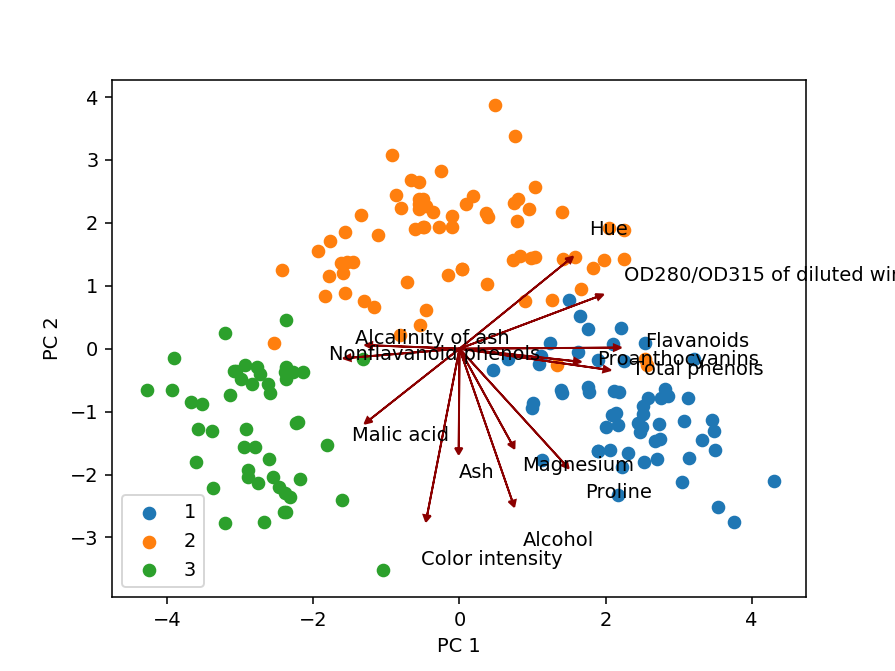

In [4]:
#PCAで作った特徴空間を描画
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

#サンプルをプロット
plt.figure()
for cl in np.unique(df_wine.iloc[:, 0].values):
    plt.scatter(x_pca[df_wine.iloc[:, 0].values == cl, 0], 
                x_pca[df_wine.iloc[:, 0].values == cl, 1],
                label=cl)

#負荷量をプロット
pc1 = pca.components_[0]
pc2 = pca.components_[1]
for i in range(x.shape[1]):
    plt.arrow(0, 0, pc1[i]*5, pc2[i]*5, head_width=0.1, head_length=0.1, color='darkred')
    plt.text(pc1[i]*6, pc2[i]*6.5, df_wine.columns[i+1])

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

In [6]:
#LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA()
x_lda = lda.fit_transform(x, df_wine.iloc[:, 0].values)

<IPython.core.display.Javascript object>


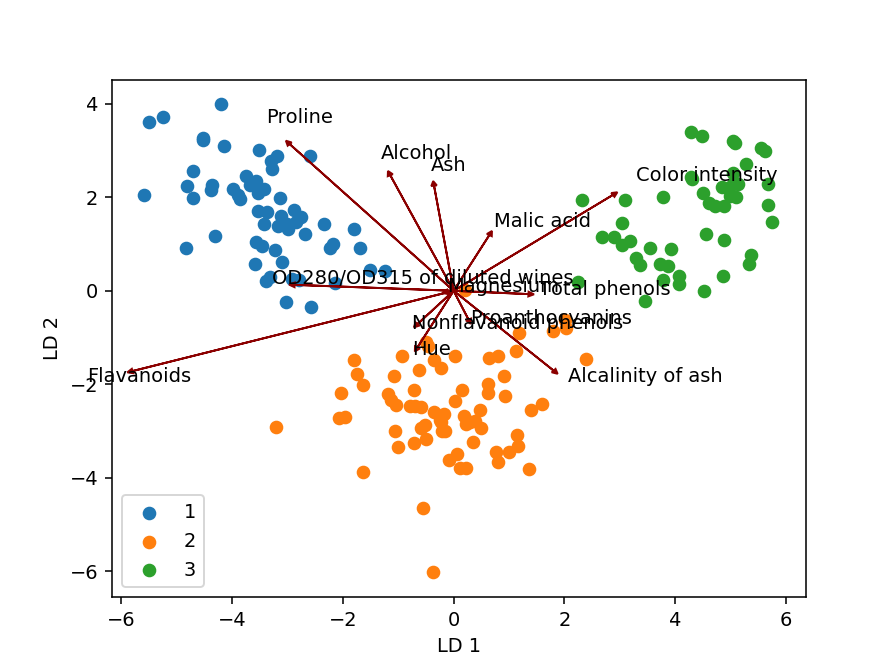

In [7]:
#LDAで作った特徴空間を描画
plt.figure()

for cl in np.unique(df_wine.iloc[:, 0].values):
    plt.scatter(x_lda[df_wine.iloc[:, 0].values == cl, 0], 
                x_lda[df_wine.iloc[:, 0].values == cl, 1],
                label=cl)

ld1 = lda.scalings_.T[0]
ld2 = lda.scalings_.T[1]
for i in range(x.shape[1]):
    plt.arrow(0, 0, ld1[i]*3.5, ld2[i]*3.5, head_width=0.1, head_length=0.1, color='darkred')
    plt.text(ld1[i]*4, ld2[i]*4, df_wine.columns[i+1])

plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.show()